**Basic Stock Market Prediction **

Made for learning and implementing KNN Classifier and Regressor. Nothing More

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance
import yfinance as yf

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400
2020-01-10,75.132271,75.698802,74.628697,75.197644,140644800
2020-01-13,76.737442,76.764077,75.330815,75.449452,121532000


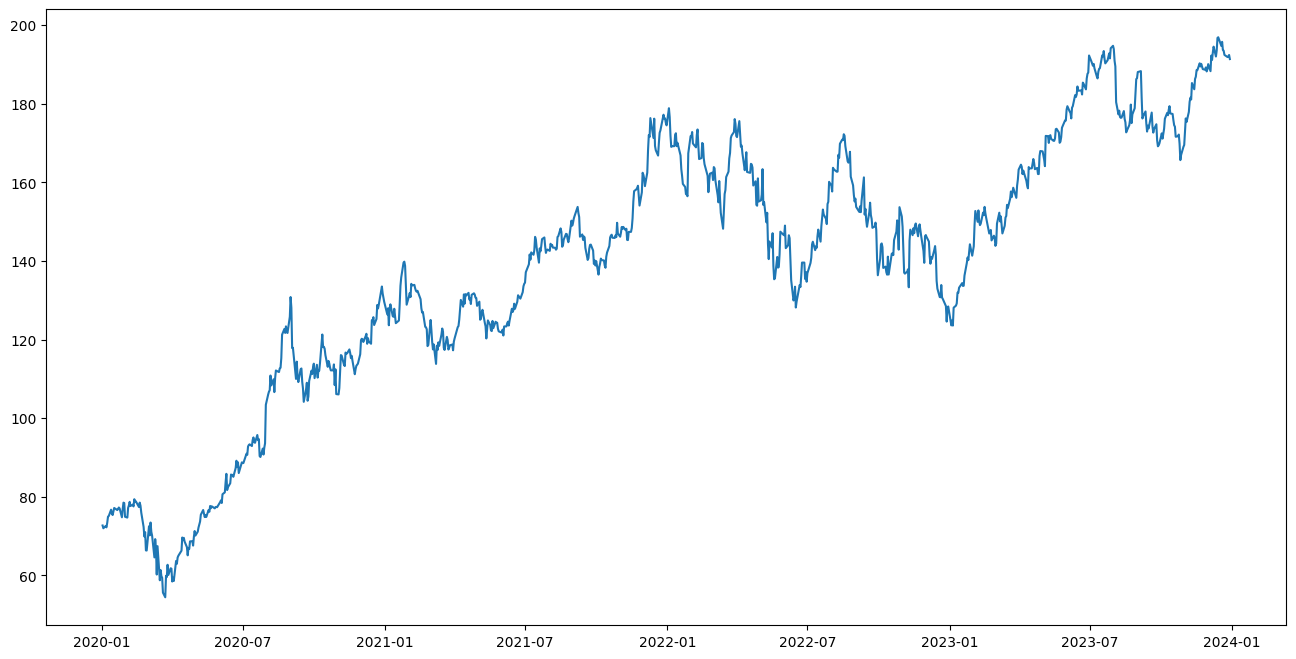

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing_Price')

In [ ]:
data['Open-Close'] = data['Open']-data['Close']
data['High-Low'] = data['High']-data['Low']
data.dropna()

Price,Close,High,Low,Open,Volume,Open-Close,High-Low
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,-0.995053,1.309786
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,-0.067789,0.987783
2020-01-06,72.582893,72.621631,70.876060,71.127851,118387200,-1.455042,1.745571
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000,0.351047,0.827993
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,-1.459890,1.762520
...,...,...,...,...,...,...,...
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800,1.570557,2.425440
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,0.556655,1.053671


In [ ]:
X=data[['Open-Close','High-Low']]
X.head()

Price,Open-Close,High-Low
Ticker,,
Date,,
2020-01-02,-0.995053,1.309786
2020-01-03,-0.067789,0.987783
2020-01-06,-1.455042,1.745571
2020-01-07,0.351047,0.827993
2020-01-08,-1.459890,1.762520


In [ ]:
Y= np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y = Y.reshape(-1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#use gridsearch to find the best parameter for knn
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fitting the model
model.fit(X_train, Y_train)

#check the accuracy score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print(accuracy_train)
print(accuracy_test)


0.7068965517241379
0.5198412698412699


In [ ]:
#Create a DataFrame to compare the predictions
actual_vs_predicted = pd.DataFrame({'Actual': Y_test, 'Predicted': model.predict(X_test)})
actual_vs_predicted

,Actual,Predicted
0,1,-1
1,-1,-1
2,1,1
3,1,-1
4,-1,1
...,...,...
247,1,-1
248,1,1
249,-1,-1
250,1,1


Now Let's Try to Implement a KNN Regressor Model

In [ ]:
y = data['Close']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

#Again we implement gridsearch to find best parameter
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13]}
knn_reg = neighbors.KNeighborsRegressor()
reg_model = GridSearchCV(knn_reg, params, cv=5)

#fitting the model
reg_model.fit(X_train, y_train)
predictions_reg = reg_model.predict(X_test)

#check the mse error
print(mse(y_test, predictions_reg))


1262.674784826045


In [ ]:
y_test = y_test.to_numpy().reshape(-1)

In [ ]:
predictions_reg = predictions_reg.reshape(-1)
predictions_reg

array([124.83519808, 105.63919322, 145.02513377, 155.62769   ,
       146.40087763, 140.5400486 , 117.94526196, 135.28457133,
       146.40308126, 147.16611226, 155.66711108, 139.17477735,
        96.87196922, 143.19572576, 140.13387426, 161.05534744,
       146.99504821, 140.15497208, 139.57272657, 114.68054835,
       129.09384473, 143.5032266 ,  99.69793828, 125.13974508,
       150.30033811, 129.01949374, 128.72047106, 138.64855385,
       148.29017893, 156.52651532, 131.27081744, 136.96116384,
        87.3226916 , 110.5219841 , 150.95316505, 146.69306946,
       138.61628596, 141.06511943, 139.84607887, 131.87715658,
       132.96989854, 144.56893539,  99.56935183, 143.48767281,
       151.58456612, 122.6145134 , 146.33815638, 157.25556819,
        98.23532295, 124.86081823, 143.63179525, 137.02192815,
       152.26248678, 104.54818344, 157.92043622, 114.58471425,
       144.90533129, 131.06532923, 151.42526499, 129.492829  ,
       147.28626823,  85.26264318, 137.33391126, 146.45

In [ ]:
#create a DataFrame to compare actual vs predicted closing prices
actual_vs_predicted_reg = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_reg})
actual_vs_predicted_reg

,Actual,Predicted
0,87.325981,124.835198
1,78.410362,105.639193
2,70.211906,145.025134
3,125.252617,155.627690
4,117.506775,146.400878
...,...,...
247,166.996048,124.088644
248,133.784195,119.429661
249,131.955765,155.353135
250,194.720917,149.623119


As we see KNNRegressor is producing a High MSE, and it is basically useless. Now let's try Linear Regression

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [ ]:
test=data['Close'].shift(-5)#Last 5 values are nan
X=np.array(test)
X=X[:-5]
test.dropna(inplace=True)
y=np.array(test)
X_predict_later = X[-5:]#We will use this for prediction later

In [ ]:
#let's preprocess X before train_test_split
X = preprocessing.scale(X)
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=44)

In [ ]:
#We already have the Train and Test data. So Let's proceed with fitting the Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(X_Train, y_train)

LinearRegression()

In [ ]:
lin_reg_predictions = lin_reg.predict(X_Test)

#check the mean square error using mse function
print(mse(y_test, lin_reg_predictions))

0.0


In [ ]:
#check the model score
print(lin_reg.score(X_Test, y_test))

1.0


In [ ]:
#compare predicted values vs actual
y_test = y_test.reshape(-1)#make the array 1-dim
y_test.shape

(401,)

In [ ]:
lin_reg_predictions = lin_reg_predictions.reshape(-1)#make the array 1-dim
lin_reg_predictions.shape

(401,)

In [ ]:
actual_vs_predicted_lin = pd.DataFrame({'Actual': y_test, 'Predicted': lin_reg_predictions})
actual_vs_predicted_lin

,Actual,Predicted
0,88.034073,88.034073
1,78.734764,78.734764
2,69.246040,69.246040
3,146.018082,146.018082
4,111.206512,111.206512
...,...,...
396,152.724274,152.724274
397,80.665855,80.665855
398,168.196854,168.196854
399,171.827164,171.827164


In [ ]:
forecast = lin_reg.predict(X_predict_later)

In [ ]:
forecast

array([[6536.34350057],
       [6518.16875335],
       [6521.47297616],
       [6535.6820473 ],
       [6500.98517153]])

Clearly the model is overfitting the data. All these above models are suggest that simple learning algorithms doesn't work effectively on stock data. We need more advanced models with neural networks like LSTM